<a href="https://colab.research.google.com/github/shreya0202/SentimentAnalysis/blob/master/NLP_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import pandas library for reading the dataset
import pandas as pd

#import sklearn model selection package to split data into train and test models
from sklearn.model_selection import train_test_split

#import numpy library for data manipulation
import numpy as np

In [0]:
#Import Natural Language Toolkit
import nltk

nltk.download('punkt')
nltk.download('stopwords') #For stop words removal
nltk.download('wordnet') #For lemmatizing
nltk.download('tagsets') #Help with any nltk tag
nltk.download('averaged_perceptron_tagger') #For POS tagging

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
#reading CSV file and storing in a variable
dataset = pd.read_csv('/content/drive/My Drive/rotten_tomato.csv')

#removing null values
dataset = dataset.dropna()

print("Here are the first 10 rows of the dataset: ")
#printing first 10 records of dataset
dataset.head(10)

Here are the first 10 rows of the dataset: 


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [0]:
dataset.groupby('Sentiment')['PhraseId'].nunique()

Sentiment
0     7072
1    27273
2    79582
3    32927
4     9206
Name: PhraseId, dtype: int64

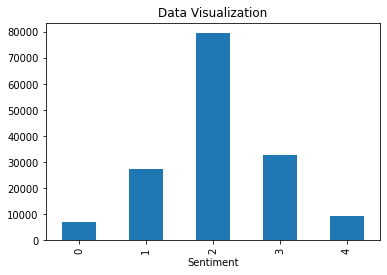

In [0]:
import matplotlib.pyplot as plt

dataset.groupby('Sentiment')['PhraseId'].nunique().plot(kind='bar')
plt.title('Data Visualization')
plt.show()

In [0]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer,LancasterStemmer
from nltk.tokenize import word_tokenize

X = dataset['Phrase']
Y = dataset['Sentiment']

stopwords_en = set(stopwords.words('english'))
porter = PorterStemmer()
lancaster = LancasterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

punctuations = "?:!.,;()-/\""

remove_punctuations = True
remove_stopwords = True
useLemma = True
useStem = False


X = X.values
Y = Y.values

reviews = X

for review in range(len(X)):
    tmp_review = []
    for word in word_tokenize(X[review]):
        new_word = word
        if remove_stopwords and (word in stopwords_en):
            continue
        if remove_punctuations and (word in punctuations):
            continue
        if useStem:
            new_word = lancaster.stem(new_word)
        if useLemma:
            new_word = wordnet_lemmatizer.lemmatize(new_word)

        tmp_review.append(new_word)

    reviews[review] = ' '.join(tmp_review)

    # if(review % 10000 == 0):
    #     print(str(review) + " records done.")



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2003)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(109242,)
(109242,)
(46818,)
(46818,)


In [0]:
#for one hot encoding
from sklearn.preprocessing import LabelBinarizer 
import numpy as np
from itertools import chain

In [0]:
# new_df = pd.DataFrame(y_train, columns=['Sentiment'])

# # new_df.index.name = 'Id'

# new_df.groupby('Sentiment')[new_df.index.name].nunique()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 1))
#bigram_vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))
#trigram_vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1, 3))
vec_len = 1000 #<set_a_length_of_your_choice>
count_vectorizer = CountVectorizer(max_features=vec_len)
encoder = LabelBinarizer()

#count_vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 1))
X = count_vectorizer.fit_transform(dataset['Phrase'])
Y = dataset['Sentiment']
x_train = count_vectorizer.transform(x_train)
y_train = encoder.fit_transform(y_train)
x_test = count_vectorizer.transform(x_test)
y_test = encoder.transform(y_test)



In [0]:
x_train_np = x_train.toarray()
y_train_np = np.array(y_train)

x_test_np = x_test.toarray()
y_test_np = np.array(y_test)

In [0]:
import torch
torch.manual_seed(2020)

from torch.nn import Conv1d, MaxPool1d, Flatten, Linear

from torch.nn.functional import relu, softmax, sigmoid

from torch.utils.data import DataLoader, TensorDataset

In [0]:
class CnnRegressor(torch.nn.Module):
  #defining initialization method
  def __init__(self, batch_size, inputs, outputs):
    #initializing super class and storing parameters
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs
    #defining input layer with kernel size 1
    self.input_layer = Conv1d(inputs, batch_size,1)
    #defining max pooling layer with kernel size 1
    self.max_pooling_layer = MaxPool1d(1)
    #defining convolution layer with kernel size 1
    self.conv_layer = Conv1d(batch_size, 128, 1)
    #defining max pooling layer with kernel size 1
    self.max_pooling_1 = MaxPool1d(1)
    #defining convolution layer with kernel size 1
    self.conv_layer_1 = Conv1d(128, 256, 1)
    #defining flatten layer
    self.flatten_layer = Flatten()
    #defining sequential layer
    self.linear_layer = Linear(256, 64)
    #defining sequential output layer
    self.output_layer = Linear(64, outputs)
    self.softmax = torch.nn.Softmax()
    #self.sigmoid = torch.nn.Sigmoid()
    #tensor.sigmoid

#method to feed inputs to the model
  def feed(self, input):
    #reshaping the input to be feed to the input layer
    input = input.reshape((self.batch_size, self.inputs, 1))
    #passing the input through relu function and getting output for first layer
    output = relu(self.input_layer(input))
    #passing output of the first layer as input in max pooling layer
    output = self.max_pooling_layer(output)
    #passing the input through relu function and getting output for second layer
    output = relu(self.conv_layer(output))
    #passing output of the second layer as input in max pooling layer
    output = self.max_pooling_1(output)
    #passing the input through relu function and getting output for third layer
    output = relu(self.conv_layer_1(output))
    #getting output for flatten layer
    output = self.flatten_layer(output)
    #getting output for linear layer
    output = self.linear_layer(output)
    #getting final output
    output = self.output_layer(output)

    #output = sigmoid(output)
    output_softmax = self.softmax(output)
    output_ = torch.round(output_softmax)
    

    return output_softmax, output_



In [0]:
#Stochastic gradient descent package
from torch.optim import Rprop, Adam

#mean absolute error loss
from torch.nn import L1Loss
!pip install pytorch-ignite
# from ignite.contrib.metrics.regression.r2_score import R2Score
from ignite.metrics import Accuracy, Recall, Precision

In [0]:
batch_size = 64
model = CnnRegressor(batch_size, x_train.shape[1], 5)
model.cuda()

CnnRegressor(
  (input_layer): Conv1d(1000, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (max_pooling_1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer_1): Conv1d(128, 256, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=256, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=None)
)

In [0]:
#method to return MSE and R^2 scores
def model_loss(model, dataset, train = False, optimizer = None):
  performance = L1Loss()
  accu = Accuracy()
  prec = Precision()
  rec = Recall()
  avg_accu = 0
  avg_rec = 0
  avg_prec = 0
  avg_loss = 0
  count = 0
  for input, output in iter(dataset):
    #getting prediction for training dataset
    predictions, predictions_ = model.feed(input)
    #getting the MSE loss
    loss = performance(predictions, output)

    accu.update([predictions_, output])
    tmp_accu = accu.compute()

    prec.update([predictions_, output])
    tmp_prec = prec.compute()

    rec.update([predictions_, output])
    tmp_rec = rec.compute()

    if(train):
      #clear errors
      optimizer.zero_grad()
      #compute gradients
      loss.backward()
      #update parameters based on gradients
      optimizer.step()
    
    #storing the loss and updating counter
    #avg_loss += loss.item()
    avg_accu += tmp_accu
    avg_prec += tmp_prec.item()
    avg_rec += tmp_rec.item()
    count += 1
 #returning Average accuracy, Precision, Recall per count
  return avg_accu / count, avg_prec / count, avg_rec / count

In [0]:
y_train_np.shape

(109242, 5)

In [0]:
# memory footprint support libraries/code
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize

# import psutil
# import humanize
# import os
# import GPUtil as GPU

# GPUs = GPU.getGPUs()
# # XXX: only one GPU on Colab and isn’t guaranteed
# gpu = GPUs[0]
# def printm():
#     process = psutil.Process(os.getpid())
#     print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
#     print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
# printm()

In [0]:
#Block to obtain training loss
epochs = 100
optimizer = Rprop(model.parameters(), lr=1e-5)
optimizer_ = Adam(model.parameters(), lr=1e-5)
inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np).cuda().float()
print(inputs.size())
print(outputs.size())
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)
accuracies = []
acc_adam = []
for epoch in range(epochs):
  avg_accu, avg_prec, avg_rec = model_loss(model, loader, train=True, optimizer=optimizer)
  av_accu, av_prec, av_rec = model_loss(model, loader, train=True, optimizer=optimizer_)
  if epoch == 0:
    accuracies = [avg_accu]
    acc_adam = [av_accu]
  else:
    accuracies = [*accuracies, avg_accu]
    acc_adam = [*acc_adam, av_accu]
  f1 = (2*(avg_prec*avg_rec)/(avg_rec + avg_prec))
  f1_adam = (2*(av_prec*av_rec)/(av_rec + av_prec))
  print("Rprop: The Training Resulting Epoch : " + str(epoch + 1) + "\n\tAccuracy = " + str(avg_accu) + "\n\tAverage Precision = " + str(avg_prec) + "\n\tAverage Recall = " + str(avg_rec) +  "\n\tF1 score = " + str(f1))
  print("Adam: The Training Resulting Epoch : " + str(epoch + 1) + "\n\tAccuracy = " + str(av_accu) + "\n\tAverage Precision = " + str(av_prec) + "\n\tAverage Recall = " + str(av_rec) +  "\n\tF1 score = " + str(f1_adam))

#saving the trained model in drive
torch.save(model.state_dict(), '/content/drive/My Drive/110534_sentiment_analysis.pth')

torch.Size([109242, 1000])
torch.Size([109242, 5])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Rprop: The Training Resulting Epoch : 1
	Accuracy = 0.8038376461230556
	Average Precision = 0.509594115307642
	Average Recall = 0.509594115307642
	F1 score = 0.509594115307642
Adam: The Training Resulting Epoch : 1
	Accuracy = 0.8040051781376186
	Average Precision = 0.510012945344046
	Average Recall = 0.510012945344046
	F1 score = 0.510012945344046
Rprop: The Training Resulting Epoch : 2
	Accuracy = 0.8037085438628433
	Average Precision = 0.5092713596571089
	Average Recall = 0.5092713596571089
	F1 score = 0.5092713596571089
Adam: The Training Resulting Epoch : 2
	Accuracy = 0.8045323128557841
	Average Precision = 0.5113307821394624
	Average Recall = 0.5113307821394624
	F1 score = 0.5113307821394624
Rprop: The Training Resulting Epoch : 3
	Accuracy = 0.8044434482625964
	Average Precision = 0.5111086206564897
	Average Recall = 0.5111086206564897
	F1 score = 0.5111086206564897
Adam: The Training Resulting Epoch : 3
	Accuracy = 0.8044117038130011
	Average Precision = 0.5110292595325041
	Av

[0.8038376461230556, 0.8037085438628433, 0.8044434482625964, 0.8040322204944694, 0.8047201502275725, 0.8034252319713, 0.8030833108750085, 0.8037880528820215, 0.8038723687496261, 0.8030983356196254, 0.8042240500779128, 0.8047748300520885, 0.804633600987872, 0.8041365591008581, 0.8037855033744518, 0.803756582520303, 0.8048912328463124, 0.8035190650293962, 0.8040585227053814, 0.8031665150865807, 0.8031669924660796, 0.8039092146769928, 0.803712025735293, 0.8040447498243937, 0.8049440655436562, 0.8044686037174618, 0.8041826923071063, 0.8043753388538093, 0.804874697665193, 0.8044446752628283, 0.8044278504206943, 0.8038891976128713, 0.8039510003966511, 0.8041883404756115, 0.8040894841940602, 0.8040119543412055, 0.8037029677960921, 0.8049553435634565, 0.8038524805136904, 0.8039821661079322, 0.8038367451298339, 0.8034378209760878, 0.8034325111350241, 0.8031526616510049, 0.8035812765501001, 0.8045779871068399, 0.8037602805093933, 0.8042924815196812, 0.8035034996953345, 0.8036532101559877, 0.8039

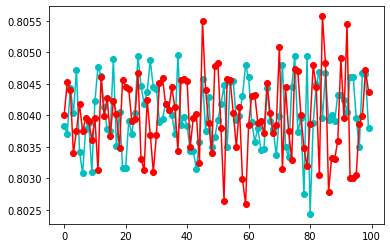

In [0]:
num_epochs = range(epochs)
plt.plot(num_epochs, accuracies, 'oc-', label='Accuracy')
plt.plot(num_epochs, acc_adam, 'oc-', label='Accuracy', color='red')
plt.show()

In [0]:
#Block to obtain test loss
optimizer = Rprop(model.parameters(), lr=1e-5)
optimizer_ = Adam(model.parameters(), lr=1e-5)
inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np).cuda().float()
print(inputs.size())
print(outputs.size())
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)
avg_accu, avg_prec, avg_rec = model_loss(model, loader, train=True, optimizer=optimizer)
av_accu, av_prec, av_rec = model_loss(model, loader, train=True, optimizer=optimizer_)
f1 = (2*(avg_prec*avg_rec)/(avg_rec + avg_prec))
f1_adam = (2*(av_prec*av_rec)/(av_rec + av_prec))
print("Rprop: The Training Resulting Accuracy = " + str(avg_accu) + "\n\tAverage Precision = " + str(avg_prec) + "\n\tAverage Recall = " + str(avg_rec) +  "\n\tF1 score = " + str(f1))
print("Adam: The Training Accuracy = " + str(av_accu) + "\n\tAverage Precision = " + str(av_prec) + "\n\tAverage Recall = " + str(av_rec) +  "\n\tF1 score = " + str(f1_adam))

torch.Size([109242, 1000])
torch.Size([109242, 5])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Rprop: The Training Resulting Accuracy = 0.8038273452366564
	Average Precision = 0.5095683630916394
	Average Recall = 0.5095683630916394
	F1 score = 0.5095683630916394
Adam: The Training Accuracy = 0.8041061423456987
	Average Precision = 0.5102653558642495
	Average Recall = 0.5102653558642495
	F1 score = 0.5102653558642495


In [0]:
#code to load the trained model
model.load_state_dict(torch.load('/content/drive/My Drive/110534_sentiment_analysis.pth'))
model.eval()

CnnRegressor(
  (input_layer): Conv1d(1000, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (max_pooling_1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer_1): Conv1d(128, 256, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=256, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=5, bias=True)
  (softmax): Softmax(dim=None)
)